### STAT 207 Lab 7: Regression models and inference

Due: Wednesday, October 23, 23:59:59

### Jaewon Kim jaewonk3

This lab consists of 3 main parts. You may add as many cells as you need in order to do the excercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

Note: not every problem in this lab requires Python calculation. In some cases you can just work it out and type in your solution into a Markdown cell. 

**Hint: all of the problems build on the class notes, so the notes are the first place to go for related examples and discussion.**


### Part 1: Two-sample analysis of lead study (9 pts)

Previously you analyzed the lead exposure study data. You should have the data file "lead.csv" in your files. It contains data from the lead exposure study discussed in our class notes. The goal of this first part is to reanalyze the data using t-tests and t confidence intervals instead of z tests and confidence intervals. The cells below have code for defining the function "myttest_ind" from the class notes.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t

In [2]:
def myttest_ind(dat1, dat2, value=0, conf=0.95):
    # sample summary statistics
    n1, n2 = np.size(dat1), np.size(dat2)
    mn1, mn2 = np.mean(dat1), np.mean(dat2)
    se1 = np.std(dat1, ddof=1)/np.sqrt(n1)
    se2 = np.std(dat2, ddof=1)/np.sqrt(n2)
    # difference and standard error
    diff = mn1 - mn2
    se_diff = np.sqrt(se1**2 + se2**2)
    # Welch t test degrees of freedom
    deg = se_diff**4 / ((se1**4/(n1-1)) + (se2**4/(n2-1)))
    # test statistic, pvalue and t confidence interval
    statistic = (diff - value)/se_diff
    tcut = t.ppf((1+conf)/2, deg)
    pvalue = 2*t.cdf(-abs(statistic), deg)
    interval = (diff - tcut*se_diff, diff + tcut*se_diff)
    # return results as a dictionary
    return {'statistic': statistic, 
            'pvalue': pvalue, 
            'df': deg, 
            'conf': conf, 
            'interval': interval}

**a) Read the lead exposure study data into a pandas data frame and extract the 'fulliq' data for the two exposure groups, 'lead < 40' and 'lead >= 40'. (2 pts).**

In [3]:
df = pd.read_csv('lead.csv')
dfl = df['fulliq'][df['group'] == 'lead < 40']
dfh = df['fulliq'][df['group'] == 'lead >= 40']

**b) Plot density histograms of 'fulliq' for each of the two exposure groups (2 pt).**

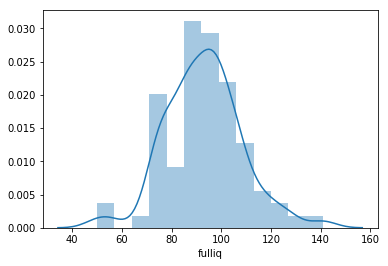

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(dfl, kde = True)

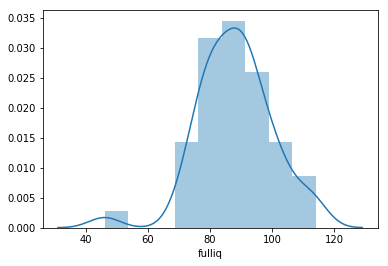

In [5]:
sns.distplot(dfh, kde = True)

**c) Using the function defined above or otherwise, compute a Welch two-sample t confidence interval, with confidence level 90%, for the difference between population mean fulliq in the low exposure group and the population mean fulliq in the high exposure group.**

**Note: A t confidence interval has the same form as a z (normal approximation) confidence interval except we replace
the normal multiplier $z_{1-{\alpha\over 2}}$ by the
t multiplier $t_{1-{\alpha\over 2}, df}$ where df = the degrees of freedom given in the notes for the Welch two-sample t test.
(2 pts)**

In [6]:
results = myttest_ind(dfl, dfh, value=0, conf=0.90)
results['interval']

(0.713687314868162, 9.012065193493049)

**d) Using the function defined above or otherwise, compute the Welch two sample t-test statistic and its p-value for testing the null hypothesis** 

$$
H_0: \mu_1 - \mu_2 = 0\quad \mbox{versus} \quad H_A: \mu_1 - \mu_2 \ne 0
$$

**where $\mu_1$ is the population mean 'fulliq' for lead exposure $\lt$ 40, and $\mu_2$ is the same for lead exposure $\ge$ 40
(3 pts)**

In [7]:
alpha = 1 - results['conf']
ttest = results['statistic']
p = results['pvalue']
print('t-test statistics:', ttest)
print('p-value:', p)
if results['pvalue'] < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

t-test statistics: 1.9439438351740028
p-value: 0.05442396547995737
Reject the null hypothesis


### Part 2: Simulated regression model (10 pts)

In this part we generate data from a linear regression model and analyze them, comparing results to the simulation model. Run the code cells below before doing your work.

In [8]:
from scipy.stats import norm
from scipy.stats import uniform
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
# generate regression data and store in data frame called 'dat'
b0, b1 = -2.53, 1.67
x = uniform.rvs(loc=0, scale=10, size=35, random_state=12347)
e = norm.rvs(loc=0, scale=2.2, size=35, random_state=1)
dat = pd.DataFrame({'x': x, 'y': b0 + b1*x + e})

**a) Make a scatter plot of y versus x. Also compute the sample correlation between them and label or title the plot showing the numerical value of their sample correlation. (See earlier notes for examples of adding titles with numerical information to plots). (3 pts)**

In [10]:
dat.corr()

,x,y
x,1.000000,0.894085
y,0.894085,1.000000


In [11]:
my_corr = dat.corr().iloc[0, 1]
my_corr

0.894085106892118

In [12]:
my_title = "Correlation = " + str(my_corr.round(3))

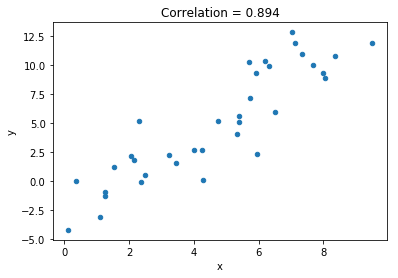

In [13]:
dat.plot.scatter(x = 'x', y = 'y')
plt.title(my_title)
plt.show()

**b) Fit a linear regression model with y as the response (endogenous) variable and x as the explanatory (exogenous) variable. Display the model summary. (3 pts)**

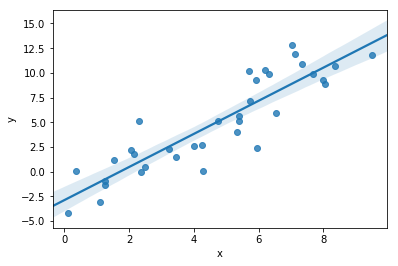

In [14]:
sns.regplot(x='x', y='y', data = dat)

In [15]:
result = smf.ols('y~x', data = dat).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           4.72e-13
Time:                        14:36:32   Log-Likelihood:                -75.793
No. Observations:                  35   AIC:                             155.6
Df Residuals:                      33   BIC:                             158.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8788      0.772     -3.731      0.001      -4.449      -1.309
x              1.6762      0.146     11.467      0.000       1.379       1.974
==============================================================================
Omnibus:                        0.097   Durbin-Watson:                   2.665
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.261
Skew:                           0.102   Prob(JB):                        0.878
Kurtosis:                       2.629   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**c) Based on the model summary, give the numerical values of the estimated slope and intercept along with their standard errors. (2 pts)**

Estimated slope is 1.6762 and the intercept is -2.8788. The standard error for intercept is 0.772 and for x, it is 0.146.

**d) Based on the model summary or otherwise, provide a $95\%$ confidence interval for the regression slope parameter (coefficient of x). Does your confidence interval include the "true" value that we know from the simulation model (yes/no)? (2pts)**

The 95% confidence interval is [1.379, 1.974] and it includes the true value that we know from the model. 

### Part 3: Regression analysis of lead study (6 pts)

Some further analysis of the lead exposure study data from 'lead.csv' in your files.

**a) Using the data from 'lead.csv' that you imported in Part 1a, fit a linear regression model with 'fulliq' as the response variable and 'age' and 'group' as the two explanatory variables. Show the summary of results from the ols fitted model (3 pts)**

In [16]:
df_res = smf.ols('fulliq~age+group', data = df).fit()
df_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fulliq   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.667
Date:                Sun, 10 Nov 2019   Prob (F-statistic):              0.193
Time:                        14:36:32   Log-Likelihood:                -504.53
No. Observations:                 124   AIC:                             1015.
Df Residuals:                     121   BIC:                             1024.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              92.9088      3.806     24.411      0.000      85.374     100.444
group[T.lead >= 40]    -4.8656      2.692     -1.808      0.073     -10.195       0.464
age                    -0.0026      0.369     -0.007      0.994      -0.733       0.728
==============================================================================
Omnibus:                        5.676   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                8.599
Skew:                           0.075   Prob(JB):                       0.0136
Kurtosis:                       4.281   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**b) When the statsmodels.ols function uses 'group' as an exogenous variable, it first constructs a 0/1 dummy variable:**

$$
\mbox{group[T.lead >= 40]} = \cases{1,& if group="lead >= 40"\\ 0,& if group="lead < 40"\\}
$$

**What is the estimated coefficient for this variable in the model? What is the p-value for the test of $H_0:$ group coefficient = 0? (2 pts)**

Estimated coefficient is -4.8656 and the p-value is 0.073.

**c) What proportion of the variance in 'fulliq' is explained by the regression model, according to the model summary? Explain where you got the number. (1 pt)**

The proportion of the variance is 0.027 according to the model summary. This value can be obtained by $R^2$.